In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import shapiro

In [101]:
df1=pd.read_csv('values.csv')
df2=pd.read_csv('labels.csv')

In [102]:
df = pd.concat([df1,df2.drop('patient_id',axis=1)],axis=1)

In [103]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [104]:
df.duplicated().value_counts()

False    180
Name: count, dtype: int64

In [105]:
df.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [107]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [108]:
for i in df:
    if len(df[i].unique())<=20:
        print(df[i].value_counts())
        print('**********************************************************')

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
**********************************************************
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
**********************************************************
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
**********************************************************
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
**********************************************************
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
**********************************************************
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
**********************************************************
sex
1    124
0     56
Name: count, dtype: int64
**********************************************************
exercise_induced_angina
0    123
1     57
Name:

In [109]:
column_name = []
for i in df:
    if len(df[i].unique())<=20:
        column_name.append(i)
column_name

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

In [110]:
categorical_df = df[column_name]

In [111]:
categorical_df

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,heart_disease_present
0,1,normal,2,0,0,2,1,0,0
1,2,normal,3,0,0,0,0,0,0
2,1,normal,4,3,0,2,1,1,1
3,1,reversible_defect,4,0,0,0,1,0,1
4,3,reversible_defect,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,1,0,1
176,2,normal,4,0,0,1,0,1,1
177,2,reversible_defect,3,0,0,0,1,1,1
178,1,normal,3,2,1,0,1,0,0


In [112]:
numerical_df=df.drop(column_name,axis=1)

In [113]:
numerical_df

,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,0z64un,128,308,0.0,45,170
1,ryoo3j,110,214,1.6,54,158
2,yt1s1x,125,304,0.0,77,162
3,l2xjde,152,223,0.0,40,181
4,oyt4ek,178,270,4.2,59,145
...,...,...,...,...,...,...
175,5qfar3,125,254,0.2,67,163
176,2s2b1f,180,327,3.4,55,117
177,nsd00i,125,309,1.8,64,131
178,0xw93k,124,255,0.0,48,175


In [115]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

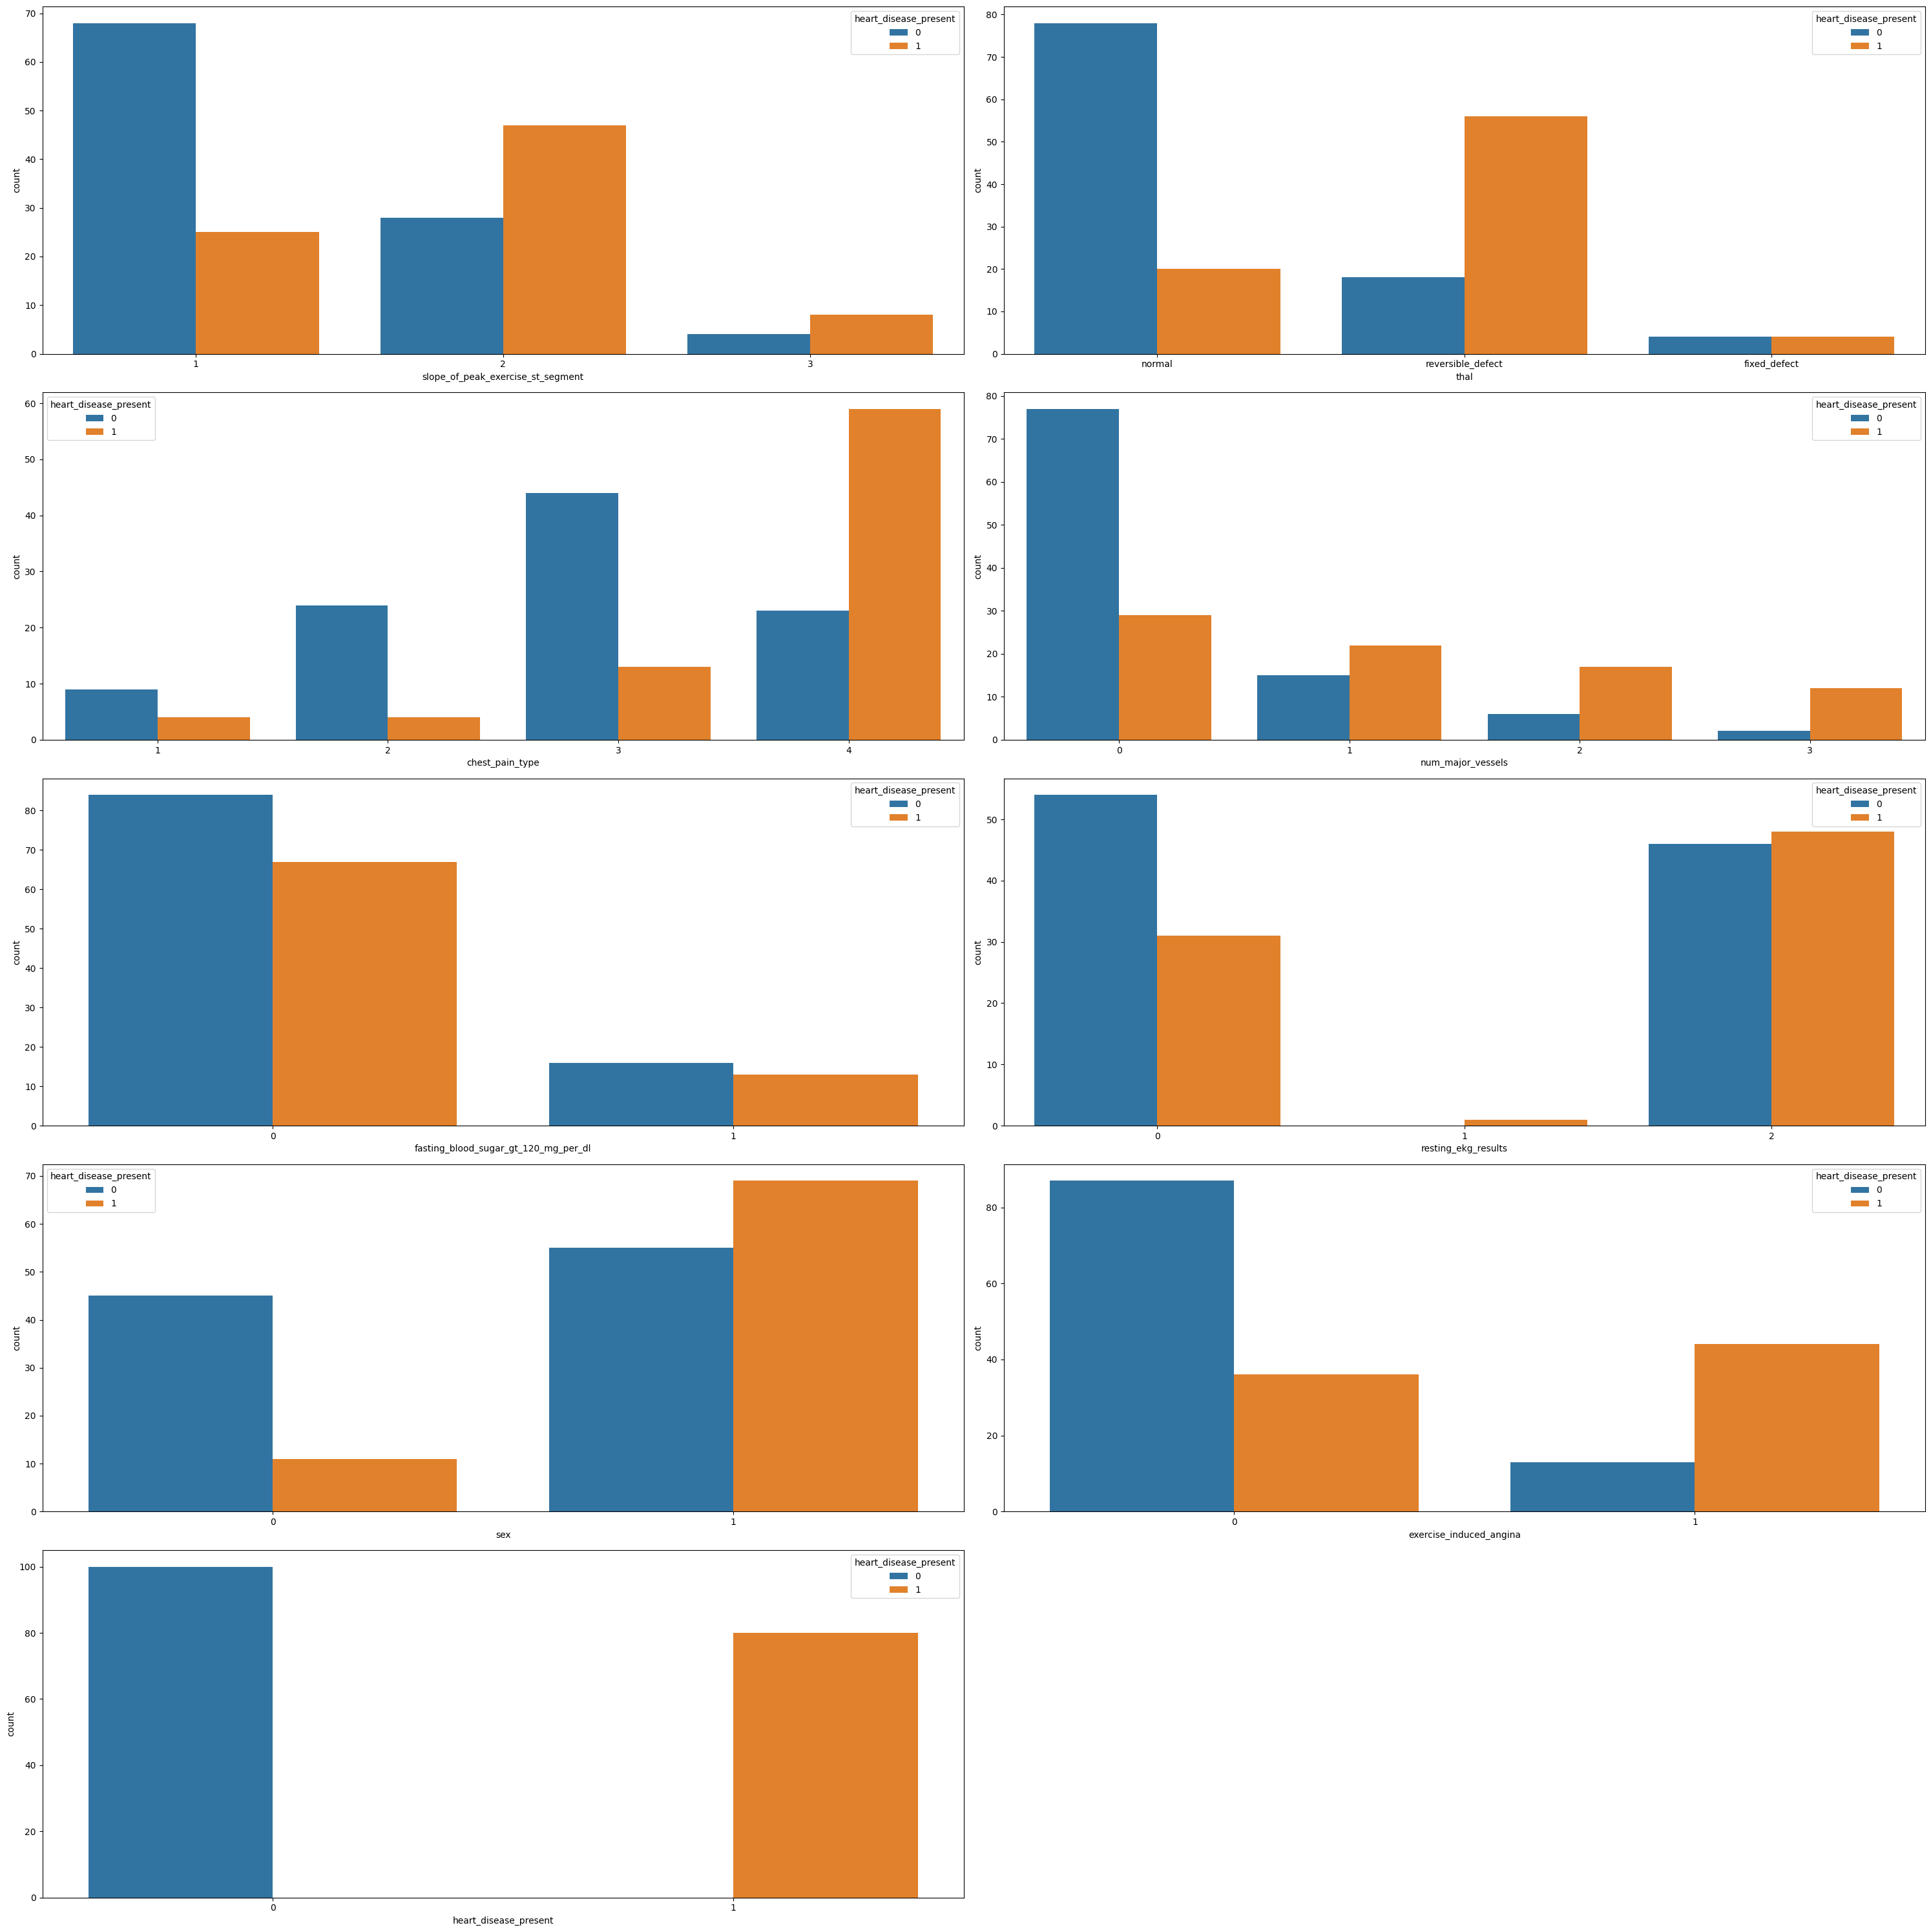

In [146]:
## created subplots to check which factors cause heart disease
plt.figure(figsize=[30,30])
j=1
for i in categorical_df:
    plt.subplot(5,2,j)
    sns.countplot(data=categorical_df,x=i,hue=categorical_df.heart_disease_present)
    j+=1
plt.tight_layout()

In [117]:
numerical_df.drop(columns='patient_id',inplace=True)

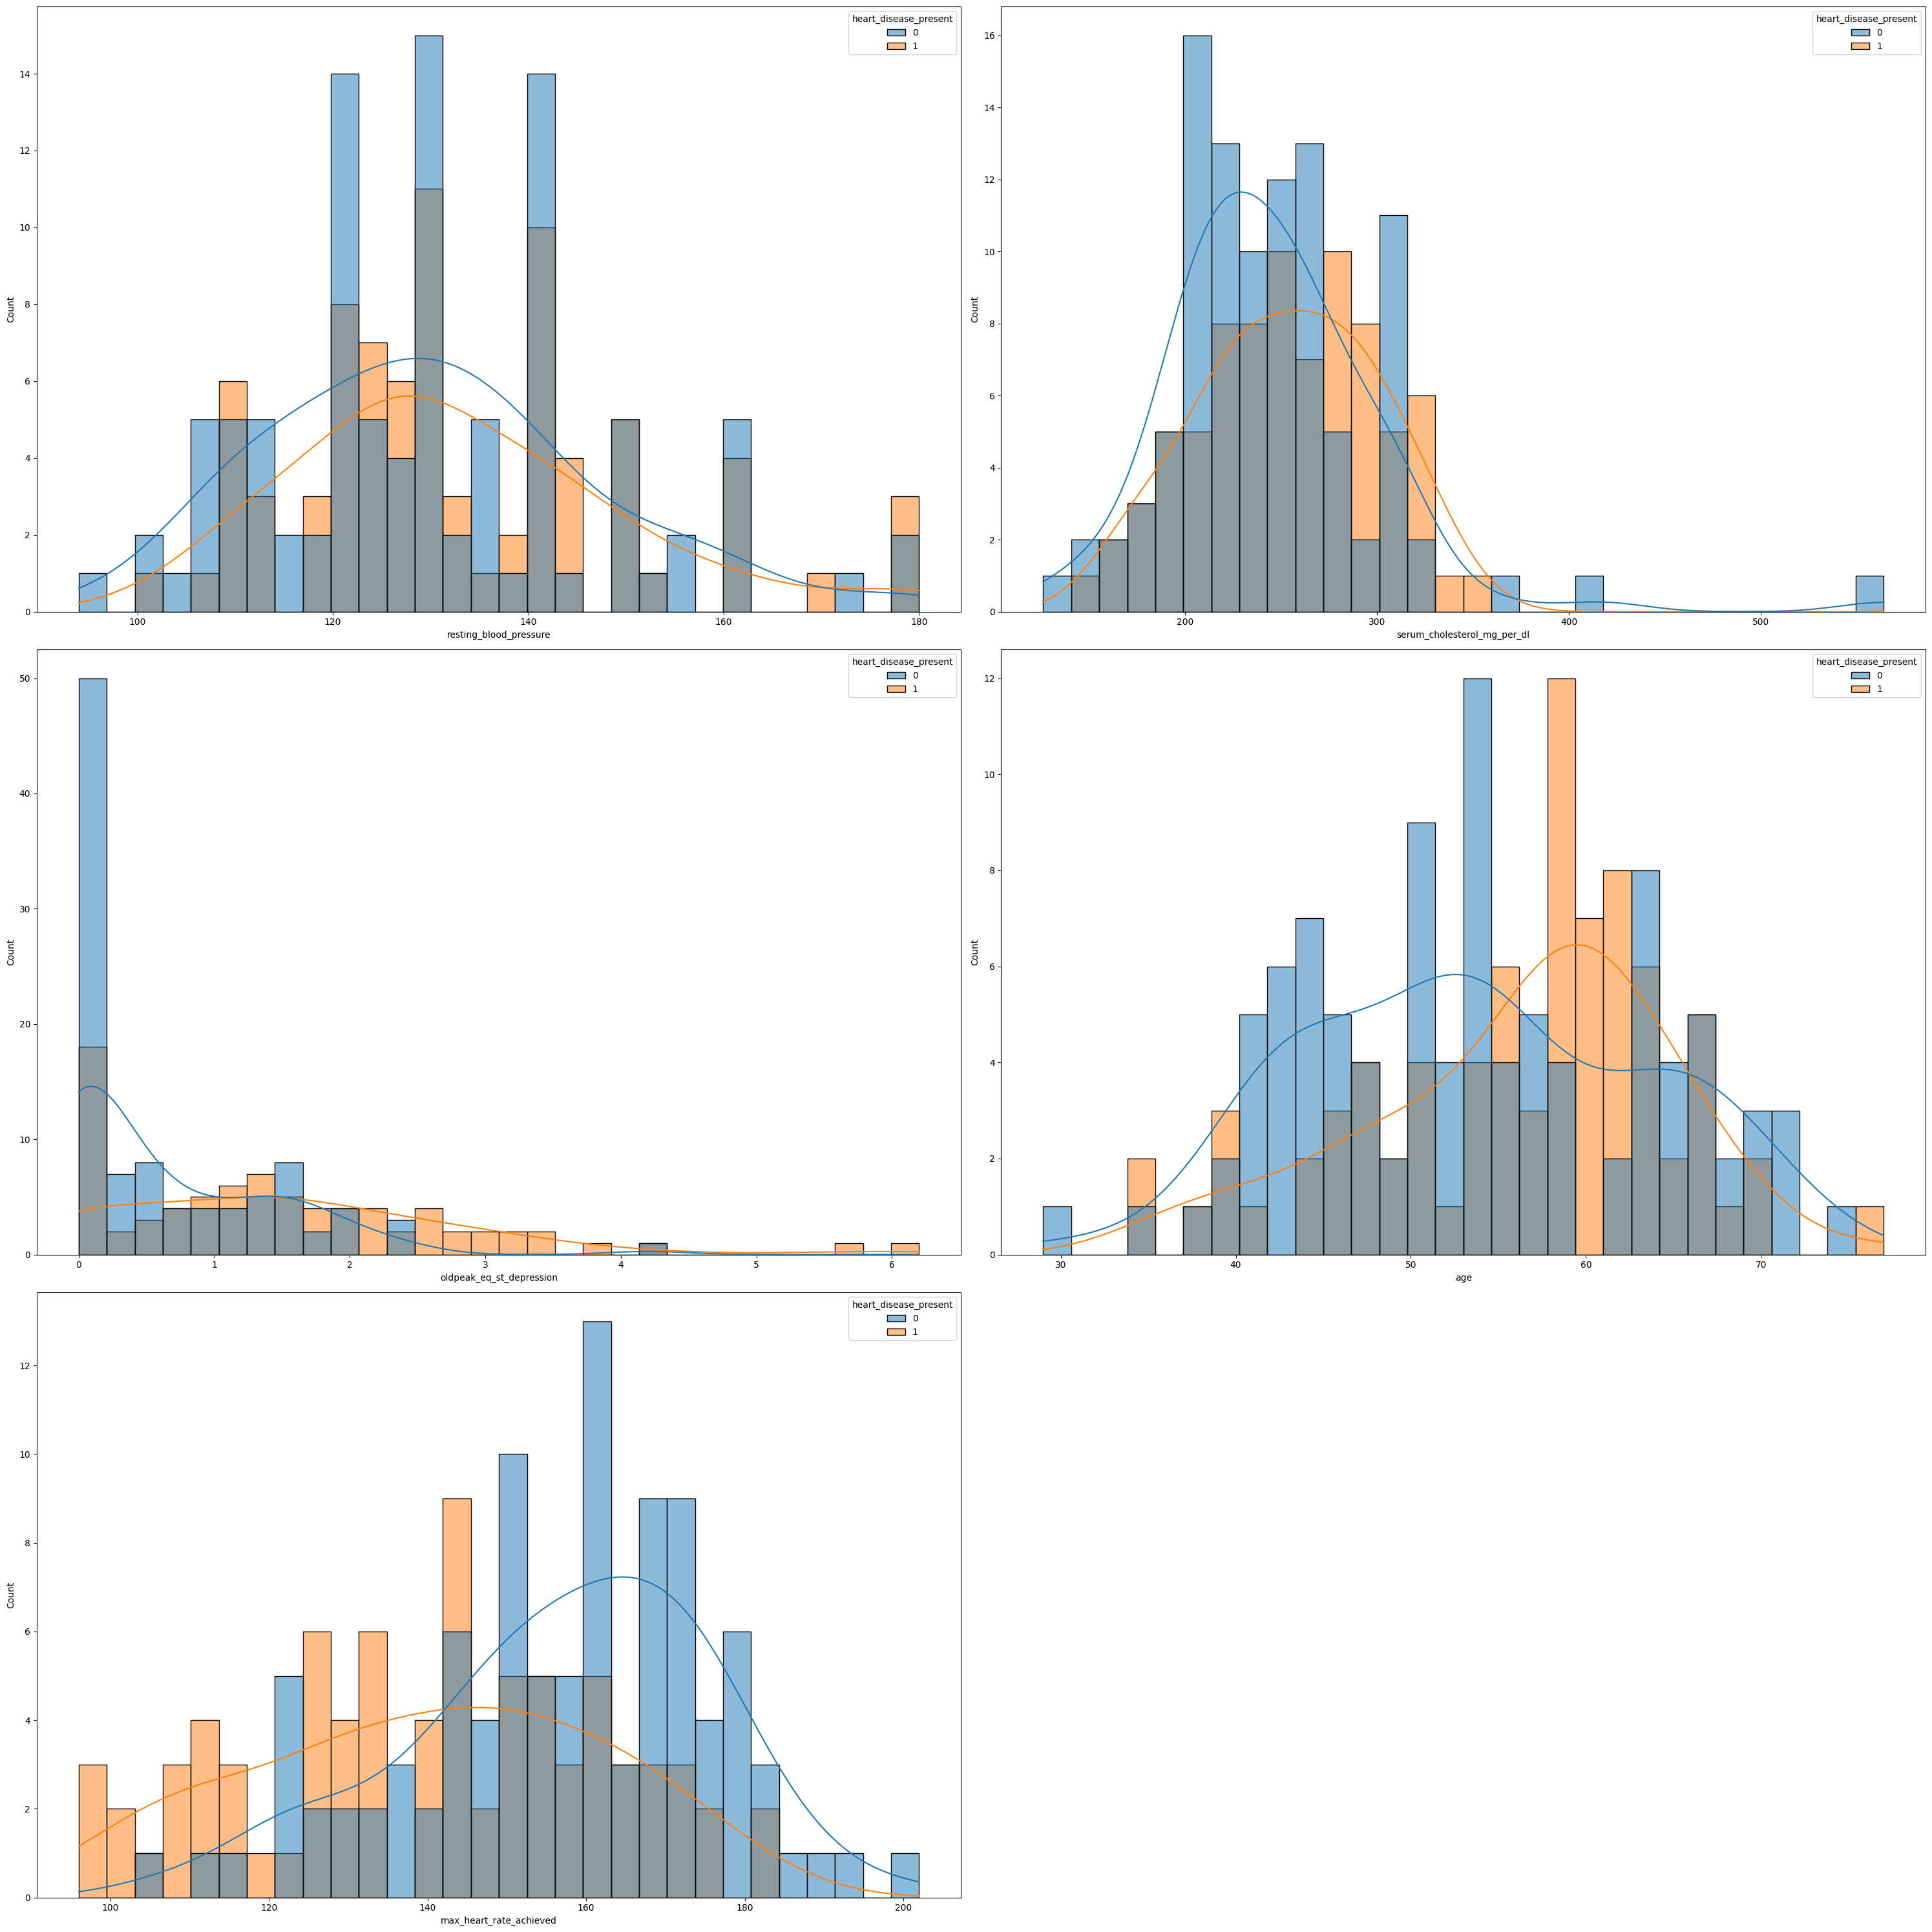

In [118]:
## created subplots to check which factors cause heart disease
plt.figure(figsize=[30,30])
j=1
for i in numerical_df:
    plt.subplot(3,2,j)
    sns.histplot(data=numerical_df,x=i,hue=categorical_df.heart_disease_present,bins=30, kde=True)
    j+=1
plt.tight_layout()

In [119]:
numerical_df

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,308,0.0,45,170
1,110,214,1.6,54,158
2,125,304,0.0,77,162
3,152,223,0.0,40,181
4,178,270,4.2,59,145
...,...,...,...,...,...
175,125,254,0.2,67,163
176,180,327,3.4,55,117
177,125,309,1.8,64,131
178,124,255,0.0,48,175


### Checking outliers 

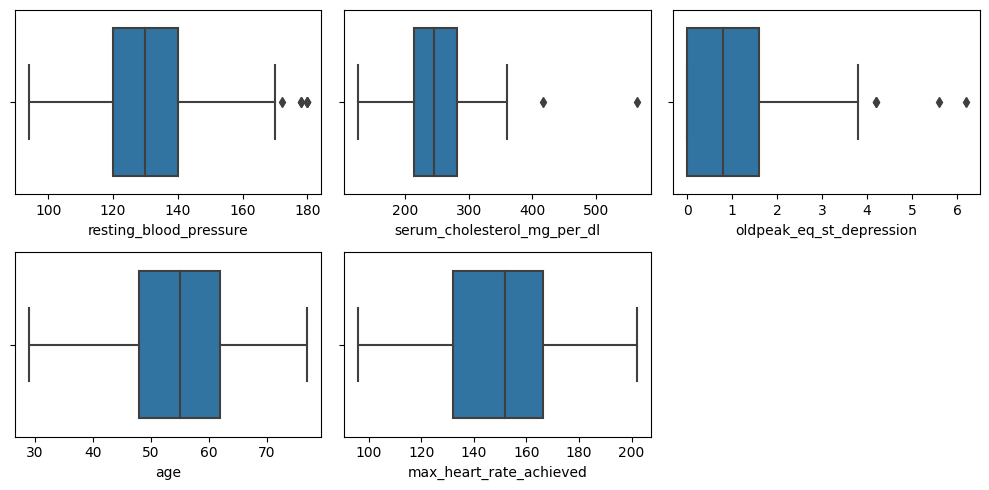

In [120]:
plt.figure(figsize=(10,5))
plotnumber = 1
for i in numerical_df.columns:
    plt.subplot(2,3,plotnumber)
    sns.boxplot(x = numerical_df[i])
    plotnumber+=1
plt.tight_layout()

In [121]:
outliers_index = []
for i in numerical_df.columns:
    rbp = numerical_df[i]
    rbp_Q1 = rbp.quantile(0.25)
    rbp_Q3 = rbp.quantile(0.75)
    rbp_IQR = rbp_Q3 - rbp_Q1
    rbp_lowerend = rbp_Q1 - (1.5 * rbp_IQR)
    rbp_upperend = rbp_Q3 + (1.5 * rbp_IQR)

    rbp_outliers = rbp[(rbp < rbp_lowerend) | (rbp > rbp_upperend)]
    outliers_index.append(rbp_outliers)

In [122]:
outliers_index

[4      178
 33     180
 72     172
 75     178
 113    180
 176    180
 Name: resting_blood_pressure, dtype: int64,
 43    417
 60    564
 Name: serum_cholesterol_mg_per_dl, dtype: int64,
 4      4.2
 112    4.2
 140    5.6
 162    6.2
 Name: oldpeak_eq_st_depression, dtype: float64,
 Series([], Name: age, dtype: int64),
 Series([], Name: max_heart_rate_achieved, dtype: int64)]

### Removing outliers record from the dataset

In [123]:
drop_index=[4,33,72,75,113,176,43,60,112,140,163]
df.drop(drop_index,inplace=True)
df.reset_index(inplace=True)

In [124]:
df.drop(columns='index',inplace=True)

<Axes: >

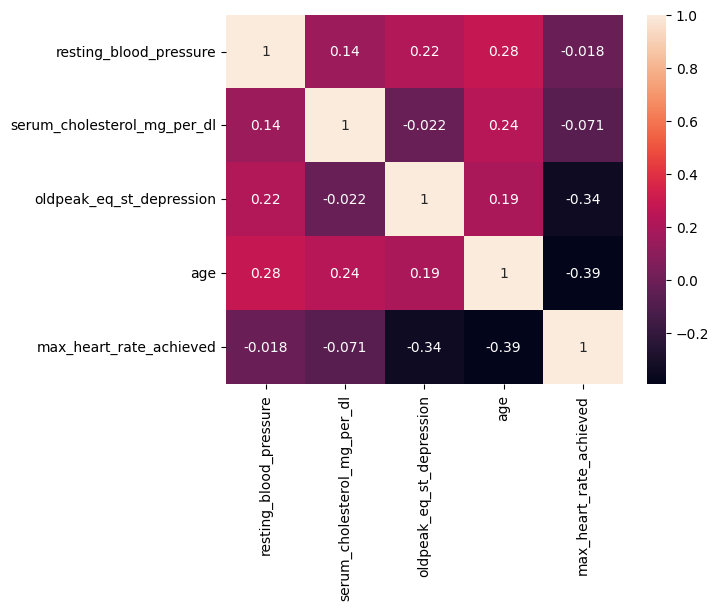

In [125]:
sns.heatmap(data=numerical_df.corr(),annot=True)

### converting categorical variables into numerical form

In [126]:
df.thal.value_counts()

thal
normal               95
reversible_defect    66
fixed_defect          8
Name: count, dtype: int64

In [127]:
df.thal.replace({'normal':0,'reversible_defect':1,'fixed_defect':2},inplace=True)

In [128]:
df.thal.value_counts()

thal
0    95
1    66
2     8
Name: count, dtype: int64

In [129]:
from scipy.stats import shapiro

In [130]:
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")

In [131]:
for i in numerical_df.columns:
    normality_test(numerical_df[i])
    print('**********************************************************')

The statistic value is 0.9617412686347961 with p-value : 7.940707291709259e-05
resting_blood_pressure is not normally distributed
**********************************************************
The statistic value is 0.9313386678695679 with p-value : 1.5666908836919902e-07
serum_cholesterol_mg_per_dl is not normally distributed
**********************************************************
The statistic value is 0.8364953398704529 with p-value : 6.196659938645377e-13
oldpeak_eq_st_depression is not normally distributed
**********************************************************
The statistic value is 0.9869499206542969 with p-value : 0.09419593960046768
age is normally distributed
**********************************************************
The statistic value is 0.976070761680603 with p-value : 0.003436662256717682
max_heart_rate_achieved is not normally distributed
**********************************************************


### Here the columns are not normally distributed. so, we will be using minmax scaler

In [132]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [133]:
df.resting_blood_pressure = mn.fit_transform(df[['resting_blood_pressure']])
df.serum_cholesterol_mg_per_dl = mn.fit_transform(df[['serum_cholesterol_mg_per_dl']])
df.age = mn.fit_transform(df[['age']])
df.max_heart_rate_achieved = mn.fit_transform(df[['max_heart_rate_achieved']])

In [134]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,0,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,ryoo3j,2,0,0.210526,3,0,0,0,0.376068,1.6,0,0.520833,0.584906,0,0
2,yt1s1x,1,0,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,l2xjde,1,1,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,ldukkw,1,0,0.473684,3,0,0,0,0.230769,0.0,1,0.270833,0.509434,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,o63ri2,1,0,0.605263,4,0,0,0,0.482906,1.2,1,0.520833,0.603774,0,0
165,5qfar3,2,1,0.407895,4,2,1,0,0.547009,0.2,1,0.791667,0.632075,0,1
166,nsd00i,2,1,0.407895,3,0,0,0,0.782051,1.8,1,0.729167,0.330189,1,1
167,0xw93k,1,0,0.394737,3,2,1,0,0.551282,0.0,1,0.395833,0.745283,0,0


In [135]:
df.drop(columns='patient_id',inplace=True)

In [136]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score,recall_score, roc_auc_score,precision_score,accuracy_score,f1_score

In [137]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

##  Handling the imbalance in the dataset

In [138]:
counter = Counter(ytrain)
print('Before',counter)

smt = SMOTE()

xtrain_sm,ytrain_sm = smt.fit_resample(xtrain,ytrain)

counter = Counter(ytrain_sm)
print('After',counter)

Before Counter({0: 72, 1: 46})
After Counter({1: 72, 0: 72})


### Logistic Regression

In [139]:
lr_model = LogisticRegression()
lr_model.fit(xtrain_sm,ytrain_sm)
y_predit_lr = lr_model.predict(xtest)
y_predit_lr

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [140]:
print('Test Score\n')
print('accuracy_score',accuracy_score(ytest,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(ytest,y_predit_lr))

Test Score

accuracy_score 0.7058823529411765 

classification_report
               precision    recall  f1-score   support

           0       0.63      0.83      0.72        23
           1       0.81      0.61      0.69        28

    accuracy                           0.71        51
   macro avg       0.72      0.72      0.71        51
weighted avg       0.73      0.71      0.70        51



In [141]:
logistic=pd.Series({'Model': "Logistic_Regression",
                'Accuracy Score':accuracy_score(ytest, y_predit_lr).round(2),
                 'Precision Score': precision_score(ytest, y_predit_lr),
                 'Recall Score': recall_score(ytest, y_predit_lr),
                 'F1 Score' : f1_score(ytest, y_predit_lr),
                 'ROC Score' : roc_auc_score(ytest, y_predit_lr),
                 })

### Support Vector Machine

In [142]:
svm_model = SVC()
svm_model.fit(xtrain_sm,ytrain_sm)
y_predit_svm = svm_model.predict(xtest)
y_predit_svm

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [143]:
print('Test Score\n')
print('accuracy_score',accuracy_score(ytest,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(ytest,y_predit_svm))

Test Score

accuracy_score 0.7647058823529411 

classification_report
               precision    recall  f1-score   support

           0       0.68      0.91      0.78        23
           1       0.90      0.64      0.75        28

    accuracy                           0.76        51
   macro avg       0.79      0.78      0.76        51
weighted avg       0.80      0.76      0.76        51



In [144]:
svm=pd.Series({'Model': "Support_vector_machine",
                'Accuracy Score':accuracy_score(ytest, y_predit_svm).round(2),
                 'Precision Score': precision_score(ytest, y_predit_svm),
                 'Recall Score': recall_score(ytest, y_predit_svm),
                 'F1 Score' : f1_score(ytest, y_predit_svm),
                 'ROC Score' : roc_auc_score(ytest, y_predit_svm),
                 })

### Random Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(xtrain_sm,ytrain_sm)
y_predit_rf = rf_model.predict(xtest)
y_predit_rf

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [66]:
print('Test Score\n')
print('accuracy_score',accuracy_score(ytest,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(ytest,y_predit_rf))

Test Score

accuracy_score 0.803921568627451 

classification_report
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.88      0.75      0.81        28

    accuracy                           0.80        51
   macro avg       0.81      0.81      0.80        51
weighted avg       0.81      0.80      0.80        51



In [84]:
rf=pd.Series({'Model': "Random_forest",
                'Accuracy Score':accuracy_score(ytest, y_predit_rf).round(2),
                 'Precision Score': precision_score(ytest, y_predit_rf),
                 'Recall Score': recall_score(ytest, y_predit_rf),
                 'F1 Score' : f1_score(ytest, y_predit_rf),
                 'ROC Score' : roc_auc_score(ytest, y_predit_rf),
                 })

### XGBoost

In [67]:
xgb_model = XGBClassifier()
xgb_model.fit(xtrain_sm,ytrain_sm)
y_predit_xgb = xgb_model.predict(xtest)


In [68]:
print('Test Score\n')
print('accuracy_score',accuracy_score(ytest,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(ytest,y_predit_xgb))

Test Score

accuracy_score 0.8235294117647058 

classification_report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.85      0.82      0.84        28

    accuracy                           0.82        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.82      0.82      0.82        51



### Hyperparameter tunning

In [69]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [71]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [72]:
random_search.fit(xtrain_sm,ytrain_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [73]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [74]:
xgb_hyp = XGBClassifier(subsample = 0.9,
  n_estimators = 300,
  min_child_weight = 1,
  max_depth = 6,
  learning_rate = 0.2,
  gamma = 0,
  colsample_bytree = 1.0)

In [75]:
xgb_hyp.fit(xtrain_sm,ytrain_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_predit_xgb_hyp = xgb_hyp.predict(xtest)
print('Test Score\n')
print('accuracy_score',accuracy_score(ytest,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(ytest,y_predit_xgb_hyp))

Test Score

accuracy_score 0.803921568627451 

classification_report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.85      0.82      0.84        28

    accuracy                           0.82        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.82      0.82      0.82        51



In [81]:
xg=pd.Series({'Model': "XGBoost",
                'Accuracy Score':accuracy_score(ytest, y_predit_xgb).round(2),
                 'Precision Score': precision_score(ytest, y_predit_xgb),
                 'Recall Score': recall_score(ytest, y_predit_xgb),
                 'F1 Score' : f1_score(ytest, y_predit_xgb),
                 'ROC Score' : roc_auc_score(ytest, y_predit_xgb),
                 })

In [85]:
Final_Report=pd.DataFrame()
Final_Report['Logistic Regression']=logistic
Final_Report['Support Vector Machine']=svm
Final_Report['Random Forest']=rf
Final_Report['XGBboost Classifier']=xg

In [86]:
Final_Report

,Logistic Regression,Support Vector Machine,Random Forest,XGBboost Classifier
Model,Logistic_Regression,Support_vector_machine,Random_forest,XGBoost
Accuracy Score,0.73,0.78,0.8,0.82
Precision Score,0.818182,0.869565,0.875,0.851852
Recall Score,0.642857,0.714286,0.75,0.821429
F1 Score,0.72,0.784314,0.807692,0.836364
ROC Score,0.734472,0.791925,0.809783,0.823758


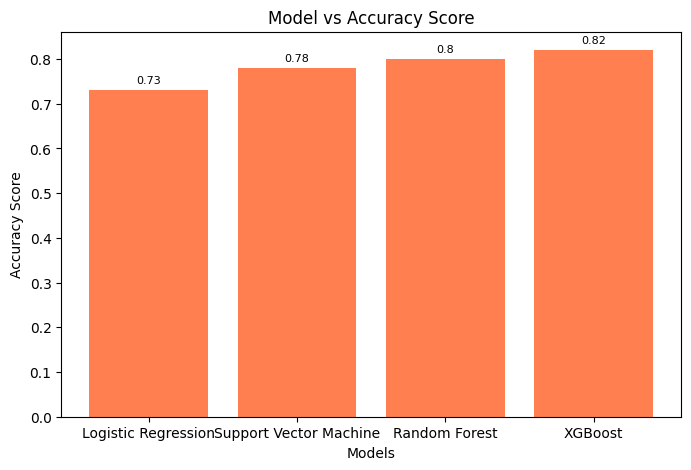

In [96]:
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'XGBoost']
accuracy_scores = [0.73, 0.78, 0.8, 0.82]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy_scores, color='coral')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=8)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model vs Accuracy Score')

plt.show()
